In [20]:
import os

In [21]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# 03_feature_visualization.ipynb
# Phase 3.3 - Swing Feature Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load processed data
symbol = "RELIANCE.NS"
"S:\Pradhan_project_workspace\swingtrade_agent\swingTrade_agent\data\processed\indicators\RELIANCE.NS.parquet"
path = f"data/processed/indicators/{symbol}.parquet"

if not os.path.exists(path):
    raise FileNotFoundError(f"{path} not found. Run feature_engineering first!")

df = pd.read_parquet(path)
df.tail()


<>:12: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
C:\Users\iamsh\AppData\Local\Temp\ipykernel_15132\3490678007.py:12: SyntaxWarning: invalid escape sequence '\P'
  "S:\Pradhan_project_workspace\swingtrade_agent\swingTrade_agent\data\processed\indicators\RELIANCE.NS.parquet"


,Date,Open,High,Low,Close,Volume,SMA_20,SMA_20_signal,EMA_20,EMA_20_signal,...,Volatility_Score,Volatility_Signal,Vol_MA,Vol_Surge,Vol_Surge_Signal,Trend_Strength,Swing_Score,Swing_Sentiment,Normalized_Swing_Score,Swing_Rank
122,2025-10-23,1475.000000,1482.900024,1444.599976,1448.400024,18707090,1390.465015,1,1403.643688,1,...,0.501023,0,11685085.20,1.600937,1,2,5.0,Strong Bullish,1.332279,0.901575
123,2025-10-24,1450.000000,1459.800049,1441.000000,1451.599976,9700837,1393.895013,1,1408.210953,1,...,0.521637,0,11873989.10,0.816982,0,0,4.0,Strong Bullish,1.114799,0.787402
124,2025-10-27,1463.000000,1485.000000,1458.000000,1484.099976,14113867,1399.480011,1,1415.438479,1,...,0.600244,0,12009125.30,1.175262,0,2,5.0,Strong Bullish,1.332279,0.901575
125,2025-10-28,1484.099976,1492.000000,1477.599976,1486.900024,17631577,1404.945013,1,1422.244340,1,...,0.598684,0,12396748.70,1.422274,0,2,4.0,Strong Bullish,1.114799,0.787402
126,2025-10-29,1490.000000,1508.300049,1488.099976,1501.000000,5923678,1411.355011,1,1429.744879,1,...,0.608187,0,11981332.65,0.494409,0,2,4.0,Strong Bullish,1.114799,0.787402


In [23]:
pwd

'S:\\Pradhan_project_workspace\\swingtrade_agent\\swingTrade_agent'

In [24]:
os.getcwd()

'S:\\Pradhan_project_workspace\\swingtrade_agent\\swingTrade_agent'

In [25]:
os.chdir("S:/Pradhan_project_workspace/swingtrade_agent/swingTrade_agent")

In [26]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_context("talk")
plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False


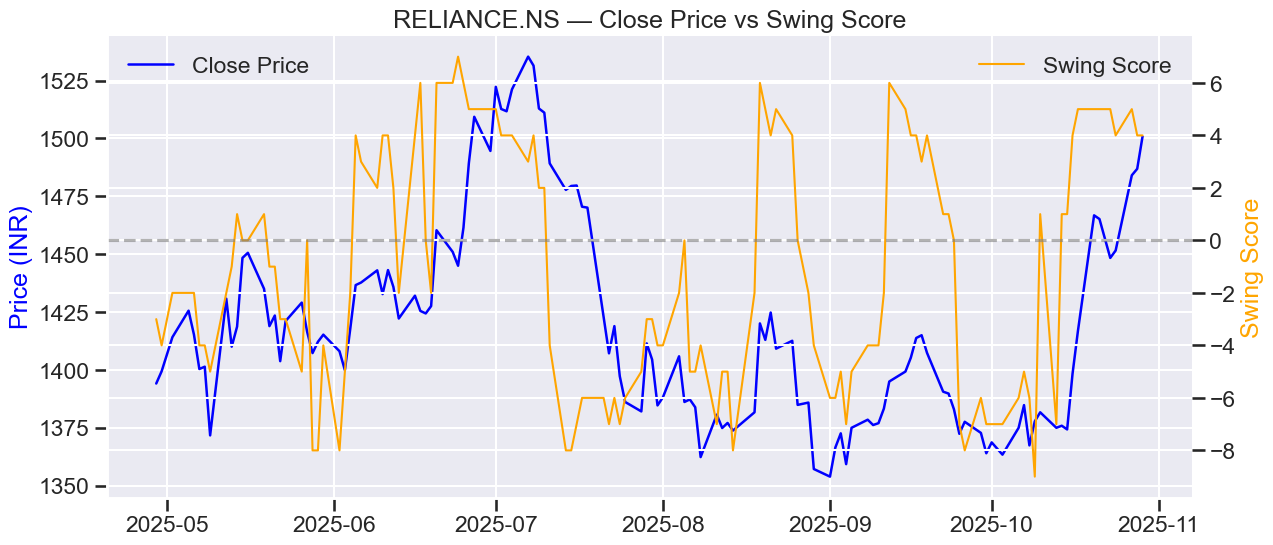

In [27]:
fig, ax1 = plt.subplots()

# Price line
ax1.plot(df["Date"], df["Close"], color="blue", label="Close Price", linewidth=1.8)
ax1.set_ylabel("Price (INR)", color="blue")

# Swing Score overlay
ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Swing_Score"], color="orange", label="Swing Score", linewidth=1.5)
ax2.axhline(0, color="gray", linestyle="--", alpha=0.6)
ax2.set_ylabel("Swing Score", color="orange")

plt.title(f"{symbol} — Close Price vs Swing Score")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


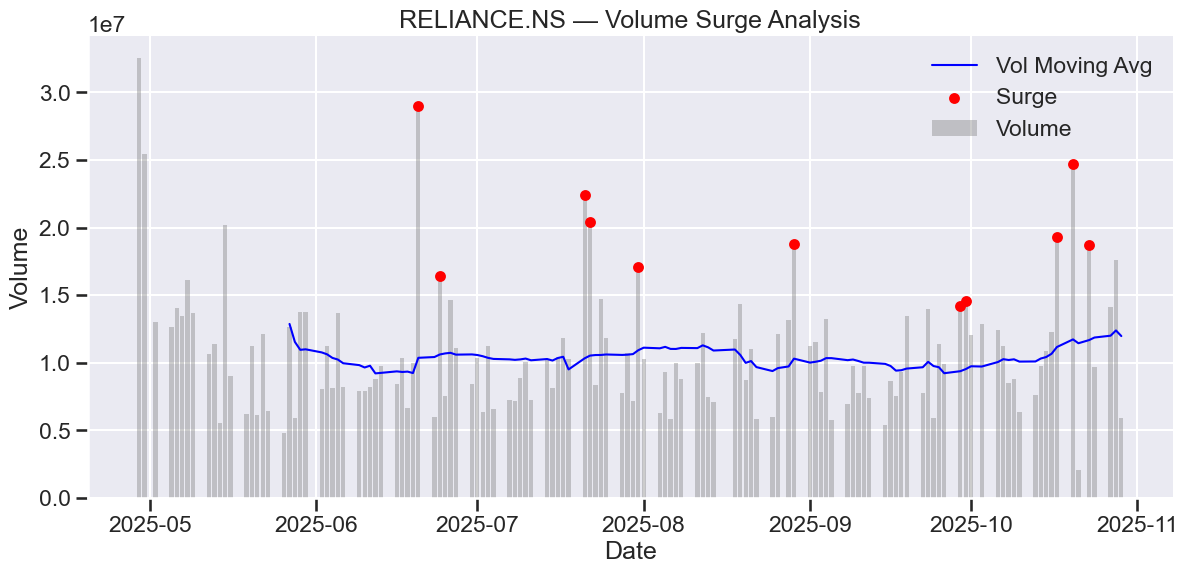

In [28]:
fig, ax = plt.subplots()

ax.bar(df["Date"], df["Volume"], label="Volume", alpha=0.4, color="gray")
ax.plot(df["Date"], df["Vol_MA"], color="blue", label="Vol Moving Avg", linewidth=1.5)

# Highlight surge zones
surge_points = df[df["Vol_Surge_Signal"] == 1]
ax.scatter(surge_points["Date"], surge_points["Volume"], color="red", label="Surge", s=40)

plt.title(f"{symbol} — Volume Surge Analysis")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


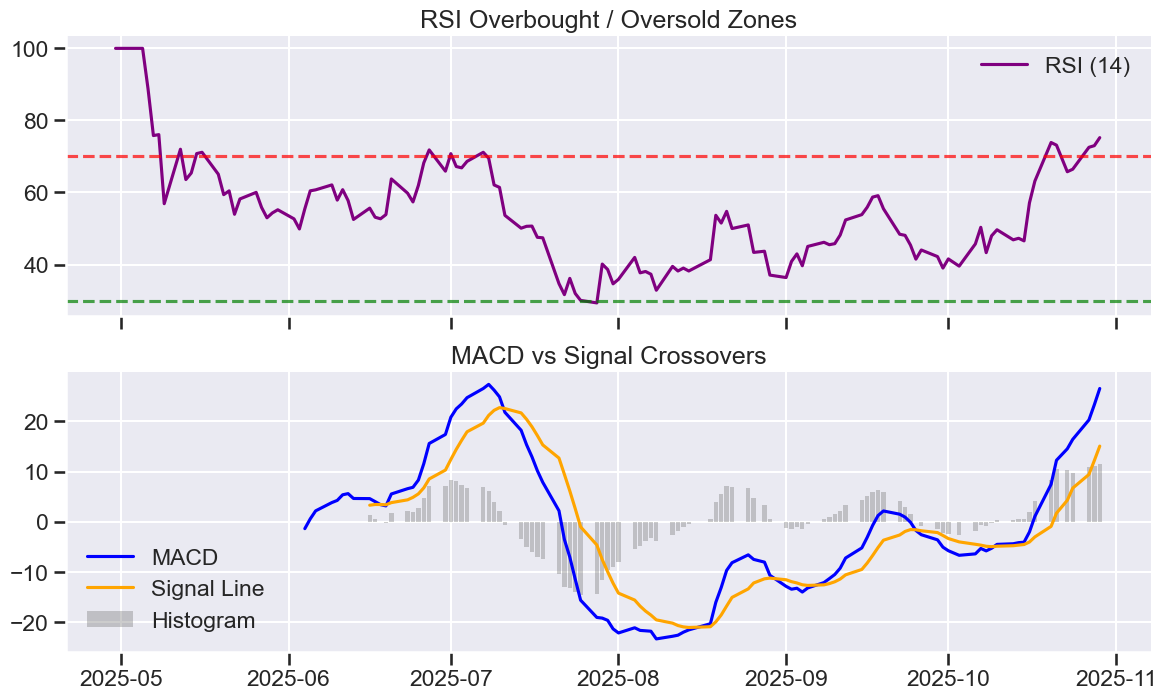

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# RSI Plot
axes[0].plot(df["Date"], df["RSI"], color="purple", label="RSI (14)")
axes[0].axhline(70, color="red", linestyle="--", alpha=0.7)
axes[0].axhline(30, color="green", linestyle="--", alpha=0.7)
axes[0].set_title("RSI Overbought / Oversold Zones")
axes[0].legend()

# MACD Plot
axes[1].plot(df["Date"], df["MACD_12_26_9"], label="MACD", color="blue")
axes[1].plot(df["Date"], df["MACDs_12_26_9"], label="Signal Line", color="orange")
axes[1].bar(df["Date"], df["MACDh_12_26_9"], label="Histogram", color="gray", alpha=0.4)
axes[1].set_title("MACD vs Signal Crossovers")
axes[1].legend()

plt.show()


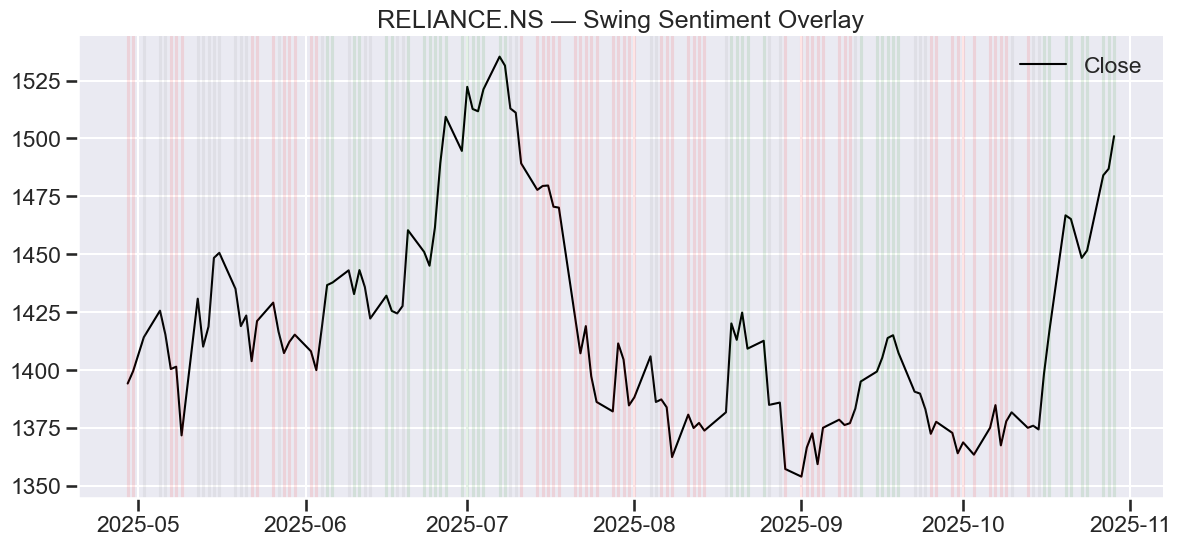

In [30]:
df["Swing_Sentiment_Color"] = df["Swing_Sentiment"].map({
    "Strong Bullish": "green",
    "Strong Bearish": "red",
    "Neutral": "gray"
})

fig, ax = plt.subplots()
ax.plot(df["Date"], df["Close"], color="black", linewidth=1.5, label="Close")
for i in range(len(df)):
    ax.axvline(df["Date"].iloc[i],
               color=df["Swing_Sentiment_Color"].iloc[i],
               alpha=0.1)
plt.title(f"{symbol} — Swing Sentiment Overlay")
plt.legend()
plt.show()


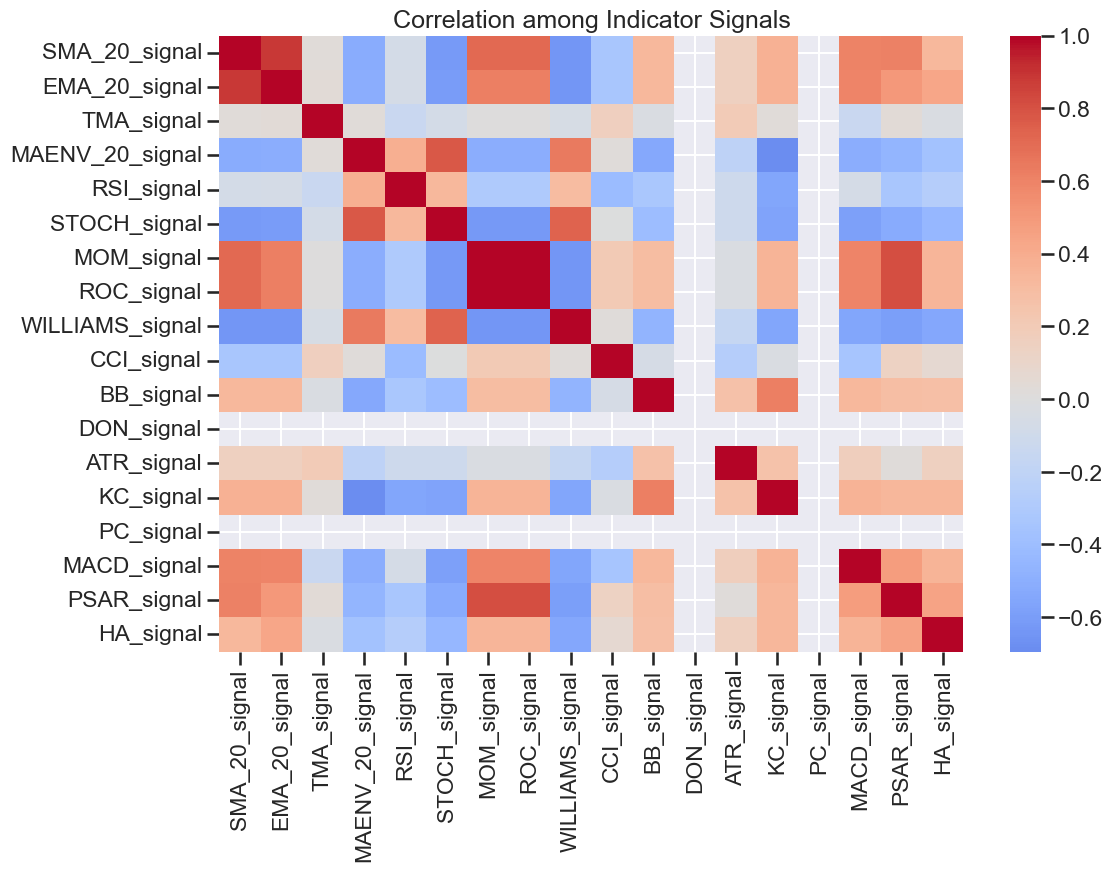

In [31]:
signal_cols = [c for c in df.columns if c.endswith("_signal")]
corr = df[signal_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation among Indicator Signals")
plt.show()


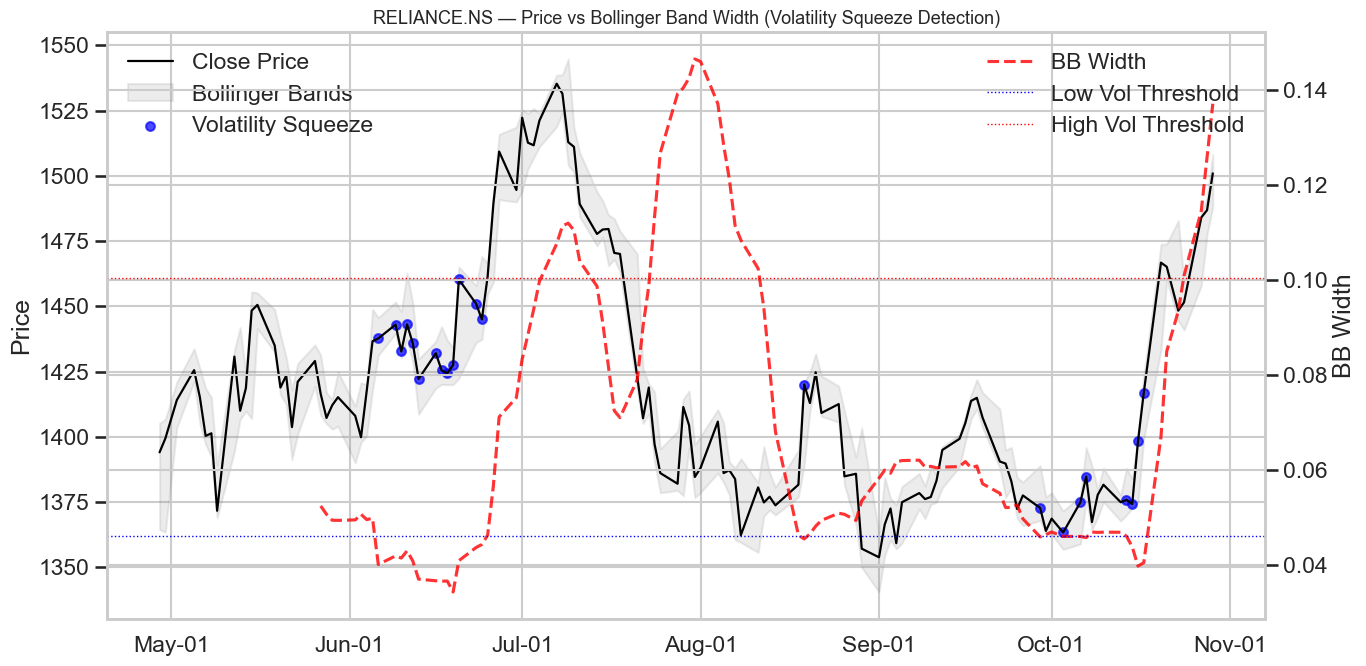

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def plot_bb_width_vs_price(df, symbol="RELIANCE.NS"):
    """
    Plot Bollinger Band Width vs Price to visualize volatility squeezes.
    Highlights where BB_Width drops below its 20th percentile (squeeze zone).
    """

    """# Ensure required columns exist
    required_cols = ["Date", "Close", "BB_Width", "High", "Low"]
    if not all(col in df.columns for col in required_cols):
        raise ValueError(f"Missing columns in DataFrame: {required_cols}")"""
    required_cols = ["Date", "Close", "BB_Width", "High", "Low"]
    for col in required_cols:
        if col not in df.columns:
            print(f"Missing column in DataFrame: {col}")

    # Convert date if needed
    if not np.issubdtype(df["Date"].dtype, np.datetime64):
        df["Date"] = pd.to_datetime(df["Date"])

    # Compute thresholds
    low_vol_threshold = df["BB_Width"].quantile(0.20)
    high_vol_threshold = df["BB_Width"].quantile(0.80)

    # Define colors
    sns.set_style("whitegrid")
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot price
    ax1.plot(df["Date"], df["Close"], label="Close Price", linewidth=1.6, color="black")
    ax1.fill_between(df["Date"], df["Low"], df["High"], alpha=0.15, color="gray", label="Bollinger Bands")

    # Highlight squeeze zones (BB_Width low)
    squeeze_zones = df[df["BB_Width"] < low_vol_threshold]
    ax1.scatter(squeeze_zones["Date"], squeeze_zones["Close"], color="blue", label="Volatility Squeeze", s=40, alpha=0.7)

    ax1.set_ylabel("Price")
    ax1.legend(loc="upper left")

    # Plot BB Width on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(df["Date"], df["BB_Width"], color="red", linestyle="--", label="BB Width", alpha=0.8)
    ax2.axhline(low_vol_threshold, color="blue", linestyle=":", linewidth=1, label="Low Vol Threshold")
    ax2.axhline(high_vol_threshold, color="red", linestyle=":", linewidth=1, label="High Vol Threshold")

    ax2.set_ylabel("BB Width")
    ax2.legend(loc="upper right")

    # Formatting
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
    plt.title(f"{symbol} — Price vs Bollinger Band Width (Volatility Squeeze Detection)", fontsize=13)
    plt.tight_layout()
    plt.show()

# Example usage
plot_bb_width_vs_price(df, symbol="RELIANCE.NS")
